In [1]:
from hmmlearn import hmm
import numpy as np
from sklearn.mixture.gmm import _validate_covars
import pandas as pd
from sklearn.preprocessing import scale,MinMaxScaler
import matplotlib.pyplot as plt

In [31]:
# 【各不相同】

# 读取数据设定隐态数量与制定指数名称
stock_data = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/CYBZ100601-181201.csv',index_col=0)
data1 = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/CYBZ_lnr_rv_w_m_ntd_100601-181201.csv',index_col=0)
n_components = 2
index_data_name = 'CYBZ'

In [32]:
# 【各不相同】

# 抽取特征向量合并为一个数据框
open_p = stock_data['open'][1:]
close_p = stock_data['close'][1:]
volume = stock_data['volume'][1:]
money = stock_data['money'][1:]
RV = data1['CYBZRV']
RVsqrt = pd.DataFrame(np.sqrt(data1['CYBZRV']))
RVsqrt.columns=['RVsqrt']
ln_r = pd.DataFrame(np.log(stock_data['close']) - np.log(stock_data['close'].shift(1))).dropna(how='any',axis=0)
ln_r.columns = ['lnR']
X = pd.concat([open_p,close_p,volume,money,RV,RVsqrt,ln_r],axis=1)
# X = pd.concat([RVsqrt,ln_r],axis=1)
# X = pd.concat([RVsqrt,ln_r],axis=1)
# 结果 X 一定是一个类似特征向量矩阵的数据框

In [33]:
# 【完全相同】

# 数据预处理-标准化
# for x in X.columns:
#     X[x] = scale(X[x])

# 数据预处理-归一化
for x in X.columns:
    min_max = MinMaxScaler()
    X[x] = min_max.fit_transform(np.array(X[x]).reshape(-1,1))

In [34]:
# 【完全相同】

# 训练HMM模型
model = hmm.GaussianHMM(n_components=n_components, n_iter=10000, tol=1e-9,covariance_type="full")
model.fit(X)
decode = model.decode(X)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
# 【各不相同】

# 设定隐态数量
H = pd.DataFrame(decode[1])
H.columns=['Hidden']
H.index=X.index
X_H = pd.concat([X,H],axis=1)
# 三个隐态
X_H['clour'] = X_H['Hidden'].apply(lambda x: {0:'r',1:'g',2:'b'}[x])
# 二个隐态
# X_H['clour'] = X_H['Hidden'].apply(lambda x: {0:'r',1:'g'}[x])

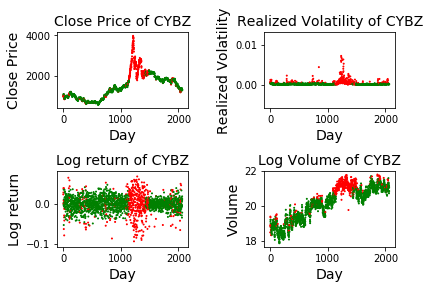

In [38]:
# 【完全相同】

fig = plt.figure(1)

# 绘图 - 收盘价与市场风格
plt.subplot(221)
plt.scatter(range(len(X.index)),list(close_p), c=list(X_H['clour']),s=1)
 
# 设置图表标题并给坐标轴加上标签
plt.title('Close Price of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# plt.show()

# 绘图 - 已实现波动率与市场风格
plt.subplot(222)
plt.scatter(range(len(X.index)),list(RV), c=list(X_H['clour']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Realized Volatility of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Realized Volatility', fontsize=14)

# plt.show()

# 绘图 - 对数收益率与市场风格
plt.subplot(223)
plt.scatter(range(len(X.index)),ln_r, c=list(X_H['clour']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Log return of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Log return', fontsize=14)

# plt.show()

# 绘图 - 交易量与市场风格
plt.subplot(224)
plt.scatter(range(len(X.index)),np.log(volume), c=list(X_H['clour']),s=1)

# 设置图表标题并给坐标轴加上标签
plt.title('Log Volume of '+index_data_name, fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Volume', fontsize=14)

fig.tight_layout()
plt.show()

In [22]:
# # 【完全相同】-废弃

# # 风格转变要求天数以及比例，例如该天往后day天中有大于prop*day为同一风格
# state_change_day = 256
# state_change_prop = 0.95

# date_lst =  list(X_H.index)
# state_lst = list(X_H['Hidden'])

# state_change_lst= []
# n_of_state = 0
# for state in state_lst[:-state_change_day]:
    
#     # 风格转变判定，自然要求该天与前一天风格不一样
#     try:
#         if state_lst[n_of_state-1] == state or state_lst[n_of_state-2] == state or state_lst[n_of_state-3] == state:
#             n_of_state += 1
#             continue
#     except:
#         pass
    
#     count_same = 0
#     for state_behind in state_lst[n_of_state+1:n_of_state+state_change_day+1]:
#         if state_behind == state:
#             count_same += 1
#     if count_same >= state_change_day*state_change_prop:
#         state_change_lst.append(date_lst[n_of_state])
#     n_of_state += 1
# state_change_lst

['2012-01-10',
 '2012-01-20',
 '2015-01-19',
 '2015-02-03',
 '2015-02-16',
 '2016-07-21']

In [15]:
# 【完全相同】

# 风格转变要求天数以及比例，例如该天往后day天中有大于prop*day为同一风格
state_change_day = 200
state_change_prop = 0.8

date_lst =  list(X_H.index)
state_lst = list(X_H['Hidden'])

state_change_lst= []
n_of_state = 0
for state in state_lst[:-state_change_day]:
    
    # 风格转变判定，自然要求该天与前N天风格大致不一样，但和后N天风格大致一样
    count_diff = 0
    for state_forward in state_lst[n_of_state-state_change_day-1:n_of_state]:
        if state_forward != state:
            count_diff += 1
    if count_diff >= state_change_day*state_change_prop:
        pass
    else:
        n_of_state += 1
        continue
    
    count_same = 0
    for state_behind in state_lst[n_of_state+1:n_of_state+state_change_day+1]:
        if state_behind == state:
            count_same += 1
    if count_same >= state_change_day*state_change_prop:
        state_change_lst.append(date_lst[n_of_state])
    n_of_state += 1
state_change_lst

['2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-26',
 '2015-03-27',
 '2015-04-02',
 '2015-04-03',
 '2015-04-07',
 '2015-04-08',
 '2015-04-09',
 '2015-04-10',
 '2015-04-13',
 '2015-04-14',
 '2015-04-15',
 '2015-04-16',
 '2015-04-17',
 '2015-04-20',
 '2015-04-21',
 '2015-04-22',
 '2015-04-23',
 '2015-04-24',
 '2015-04-27',
 '2015-04-28',
 '2015-04-29',
 '2015-04-30',
 '2015-05-04',
 '2015-05-05',
 '2015-05-06',
 '2015-05-07',
 '2015-05-08',
 '2015-05-11',
 '2015-05-12',
 '2015-05-13',
 '2015-05-14',
 '2015-05-15',
 '2016-02-04',
 '2016-02-05',
 '2016-02-16',
 '2016-02-17',
 '2016-02-18',
 '2016-02-19',
 '2016-02-22',
 '2016-02-23',
 '2016-02-24',
 '2016-03-15',
 '2016-03-25',
 '2016-03-31',
 '2016-04-01',
 '2016-04-05',
 '2016-04-06',
 '2016-04-11',
 '2016-04-12',
 '2016-04-13',
 '2016-04-14',
 '2016-04-15',
 '2016-04-18',
 '2016-04-19',
 '2016-04-21',
 '2016-04-22',
 '2016-04-25']